In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Create some simple data (feel free to create your own raw data and see how the clustering changes)
X = np.array([[1, 2], [3, 3], [3, 4], [4, 4], [7, 7], [7, 8], [8, 9], [9, 10]])

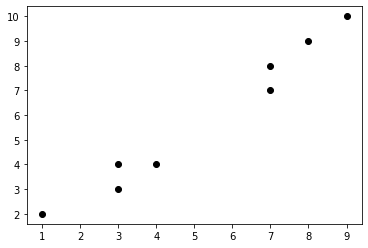

In [3]:
# Plot the data (optional, but always nice, especially if you want to eye ball potential clusters)
plt.scatter(X[:, 0], X[:, 1], c='k')

In [4]:
# STEP 1: Set the number of clusters (can use elbow or other method on actual data)
k = 2

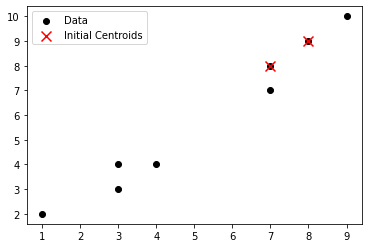

In [16]:
# STEP 2: Randomly initialize the centroids
centroids = X[np.random.choice(X.shape[0], k, replace=False)]

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c='k', label='Data')

# Plot the randomly initialized centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x', s=100, label='Initial Centroids')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [17]:
# Initialize labels array - this stage aids in tracking which cluster a data point belongs to
labels = np.zeros(X.shape[0])

# Maximum number of iterations for K-means - this helps prevent the interative algorithm running forever
max_iterations = 100

In [18]:
# K-means clustering - this is where the fun really happens and includes steps 3, 4, and 5 
for iteration in range(max_iterations):
    # Step 3: Assign each data point to the closest centroid
    for i in range(X.shape[0]):
        distances = np.linalg.norm(X[i] - centroids, axis=1)
        labels[i] = np.argmin(distances)

    # Step 4: Update centroids
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

    # Step 5: Check for cluster stability - repeated 3 and 4 until stable then END
    if np.all(centroids == new_centroids):
        break

    centroids = new_centroids


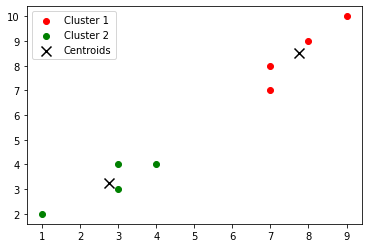

In [19]:
# Define cluster colors and labels 
cluster_colors = ['r', 'g']
cluster_labels = ['Cluster 1', 'Cluster 2']

# Plot the data points with cluster labels
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=cluster_colors[i], label=cluster_labels[i])

# Plot the final centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='k', marker='x', s=100, label='Centroids')

# Show the legend
plt.legend()

# Show the plot
plt.show()